CASO 2

C:\Users\danie\AppData\Local\Temp\ipykernel_7808\1487297324.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


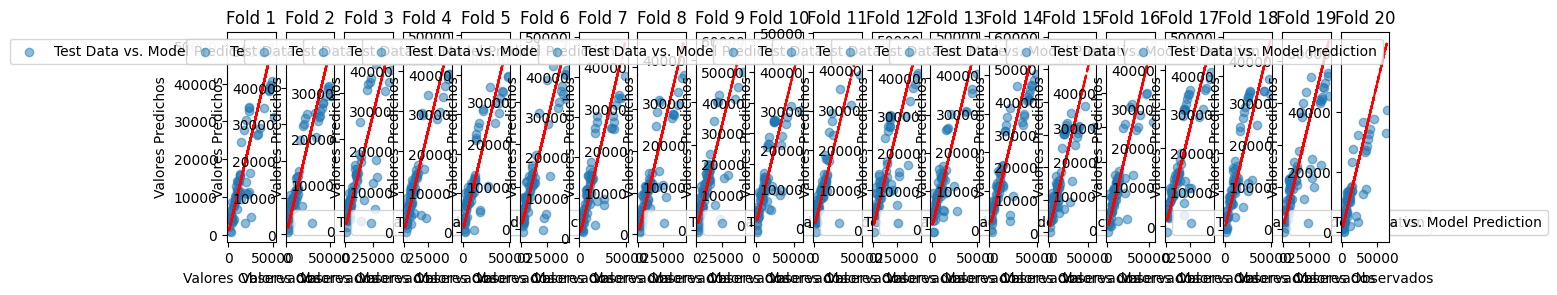

MSE promedio para K-Fold CV: 36701485.92775258
MSE de cada pliegue: [42825300.87489888, 24896218.008981213, 36620476.65985733, 23795523.58734586, 32413275.13657207, 39799290.2975961, 33507201.87889551, 25705128.213099677, 27755253.62825355, 56004661.86105529, 12107843.898862345, 51992383.0386029, 29785834.6212284, 36711322.513443984, 45947877.50111021, 35498841.958451286, 39284827.338758886, 37837430.96826016, 45280168.623936296, 56260857.94584152]


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Método 1: K-Fold Cross-Validation
k = 20  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo en el conjunto de entrenamiento
    modelo_fitted = modelo.fit()

    # Predecir sobre el conjunto de prueba
    y_pred = modelo_fitted.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(y_test, y_pred, label='Test Data vs. Model Prediction', alpha=0.5)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea de identidad
    plt.title(f'Fold {fold}')
    plt.xlabel('Valores Observados')
    plt.ylabel('Valores Predichos')
    plt.legend()
    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print("MSE de cada pliegue:", mse_scores)

#k=3, 36680455.99149378
#K=5, 36686587.6234814
#k=10,36692305.93968387
#k=15,36691072.50789375
#k=20,36701485.92775258

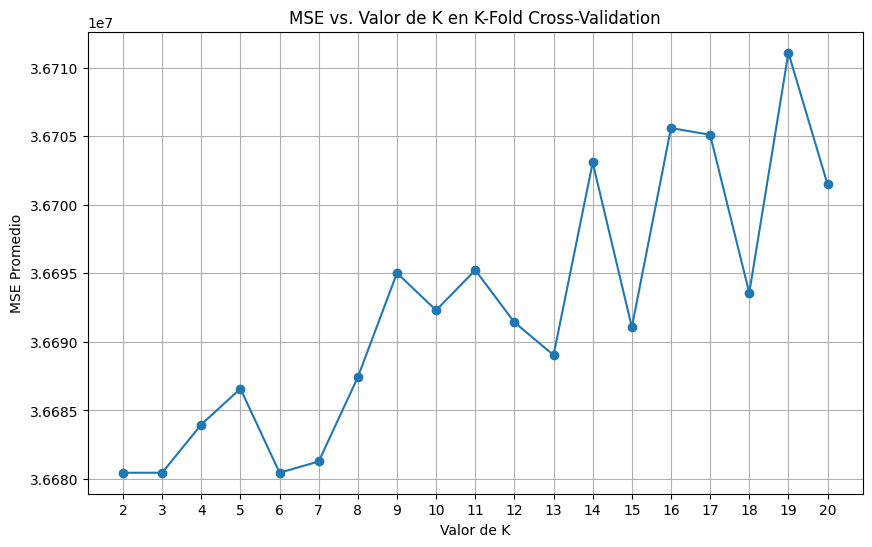

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Definir una lista para almacenar los MSE de cada iteración
mse_values = []

# Definir una lista para almacenar los valores de K
k_values = range(2, 21)  # Rango de valores de K que quieres probar

# Realizar la validación cruzada para diferentes valores de K
for k in k_values:
    # Inicializar K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    # Lista para almacenar los MSE de cada pliegue
    mse_scores = []
    
    # Realizar la validación cruzada
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Ajustar el modelo en el conjunto de entrenamiento
        modelo_fitted = modelo.fit()

        # Predecir sobre el conjunto de prueba
        y_pred = modelo_fitted.predict(X_test)

        # Calcular el Error Cuadrático Medio (MSE) para este pliegue
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
    
    # Calcular el MSE promedio para este valor de K
    mean_mse = np.mean(mse_scores)
    
    # Almacenar el MSE promedio en la lista de valores de MSE
    mse_values.append(mean_mse)

# Graficar los valores de MSE en función de los valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. Valor de K en K-Fold Cross-Validation')
plt.xlabel('Valor de K')
plt.ylabel('MSE Promedio')
plt.xticks(k_values)
plt.grid(True)
plt.show()